In [1]:
import scanpy as sc
import numpy as np
import scanpy.external as sce
import pandas as pd
import scvelo as scv
import seaborn as sns
import matplotlib.pyplot as plt
import importlib
import sys
import symphonypy as sp

# Figures aesthetics
sc.set_figure_params(dpi=150)

# Pathes
DATA_PATH = "/home/sergey/data/clonal_project"
HOME_PATH = "/home/sergey/projects/clonal_project"

# Additional functions
exec(open(f"{HOME_PATH}/tools/tools.py").read())
sns.set_style("ticks")

g2m_genes = list(pd.read_csv("/home/sergey/data/additional/cell_cycle_genes/G2M_phase.txt", names=["gene"]).gene)
g2m_genes = [gene[0].upper() + gene[1:].lower() for gene in g2m_genes]

s_genes = list(pd.read_csv("/home/sergey/data/additional/cell_cycle_genes/S_phase.txt", names=["gene"]).gene)
s_genes = [gene[0].upper() + gene[1:].lower() for gene in s_genes]

In [3]:
adata_counts = sc.read_h5ad(f"{DATA_PATH}/anndatas_counts/reference_E13.h5ad")
adata_m = sc.read_h5ad(f"{DATA_PATH}/anndatas/mesenchyme_face_E13_reference.h5ad")
adata_n = sc.read_h5ad(f"{DATA_PATH}/anndatas/neurons_glia_face_E13_reference.h5ad")
adata_o = sc.read_h5ad(f"{DATA_PATH}/anndatas/other_cells_face_E13_reference.h5ad")

adata = adata_counts[list(adata_m.obs_names) + list(adata_n.obs_names) + list(adata_o.obs_names)]

ct_l0 = pd.Series(index=adata.obs_names)
ct_l0[adata_m.obs_names] = "Mesenchyme"
ct_l0[adata_n.obs_names] = "Neurons and glia"
ct_l0[adata_o.obs_names] = "Other"

In [7]:
prepare_embedding(adata, "face_E13")

Harmony integration with harmonypy is preforming.


2023-03-14 02:31:54,001 - harmonypy - INFO - Iteration 1 of 30
2023-03-14 02:32:10,571 - harmonypy - INFO - Iteration 2 of 30
2023-03-14 02:32:26,321 - harmonypy - INFO - Iteration 3 of 30
2023-03-14 02:32:42,358 - harmonypy - INFO - Converged after 3 iterations
2023-03-14 02:33:02.739857: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-14 02:33:02.852480: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 02:33:02.852509: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03

In [2]:
adata = sc.read_h5ad(f"{DATA_PATH}/anndatas/face_E13_reference.h5ad")
adata_m = sc.read_h5ad(f"{DATA_PATH}/anndatas/mesenchyme_face_E13_reference.h5ad")
adata_n = sc.read_h5ad(f"{DATA_PATH}/anndatas/neurons_glia_face_E13_reference.h5ad")
adata_o = sc.read_h5ad(f"{DATA_PATH}/anndatas/other_cells_face_E13_reference.h5ad")

ct_l0 = pd.Series(index=adata.obs_names)
ct_l0[adata_m.obs_names] = "Mesenchyme"
ct_l0[adata_n.obs_names] = "Neurons and glia"
ct_l0[adata_o.obs_names] = "Other"

adata.obs["celltype_l0"] = ct_l0

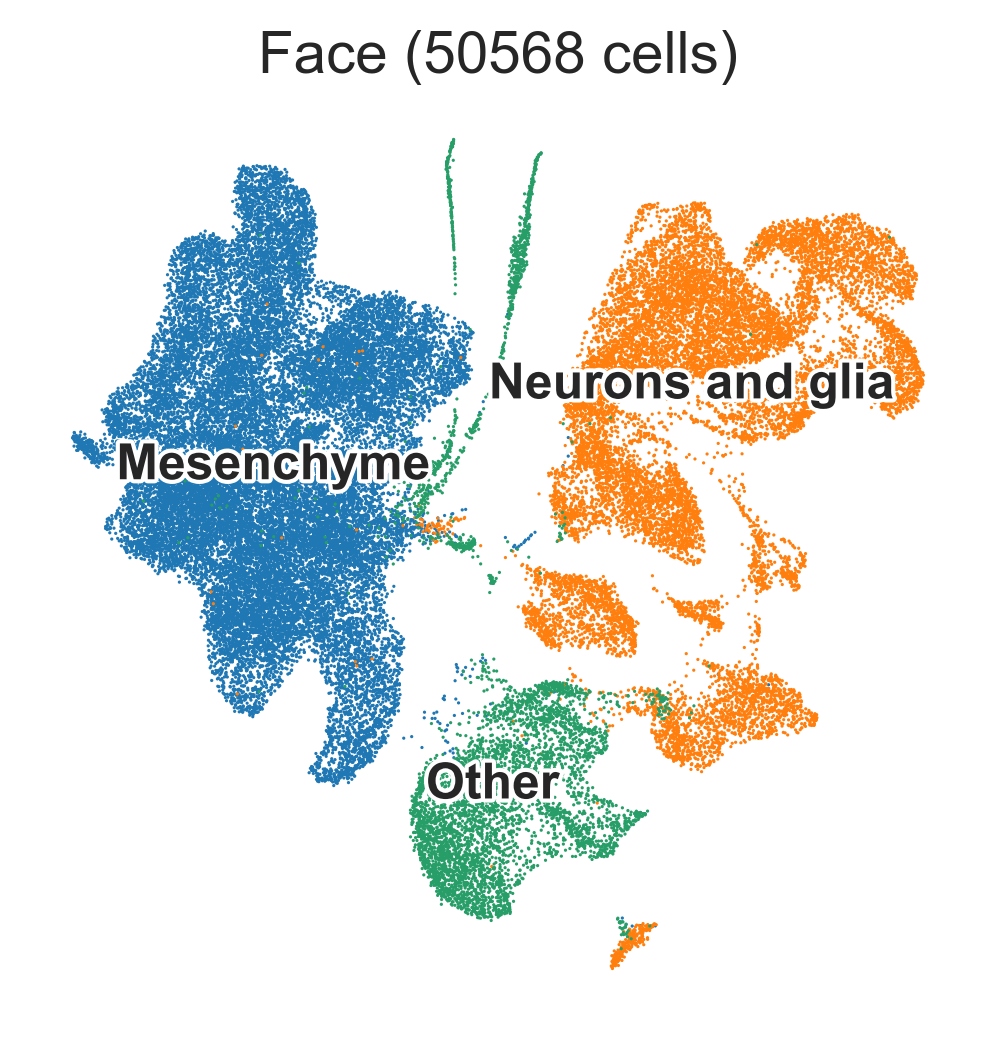

In [4]:
sc.pl.umap(adata, color="celltype_l0", frameon=False, legend_loc="on data", legend_fontoutline=2, legend_fontsize=12, title=f"Face ({len(adata)} cells)")

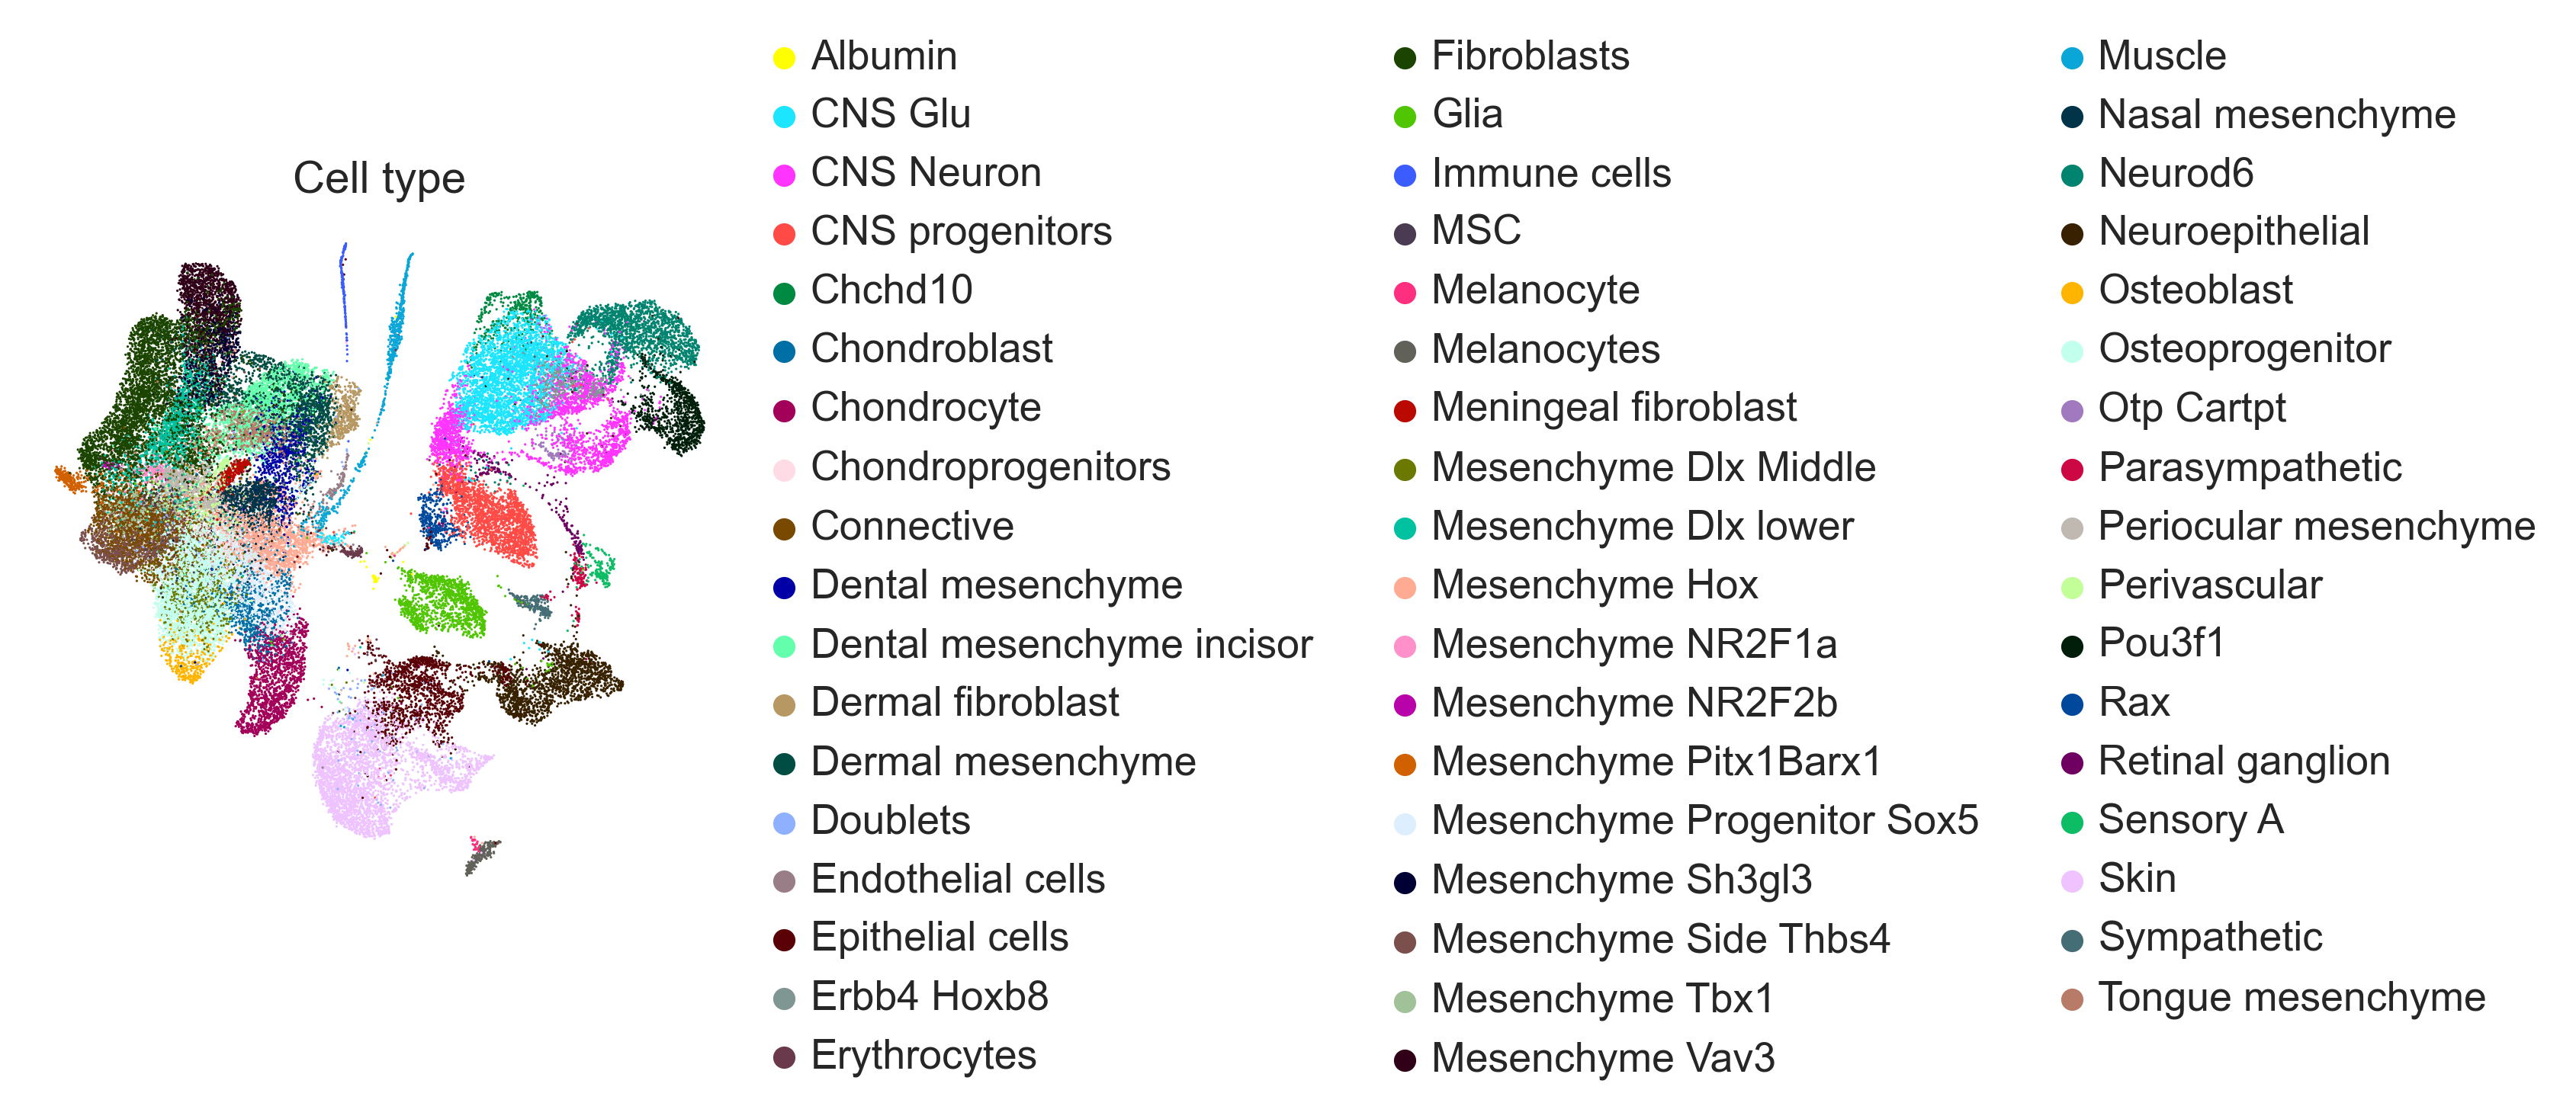

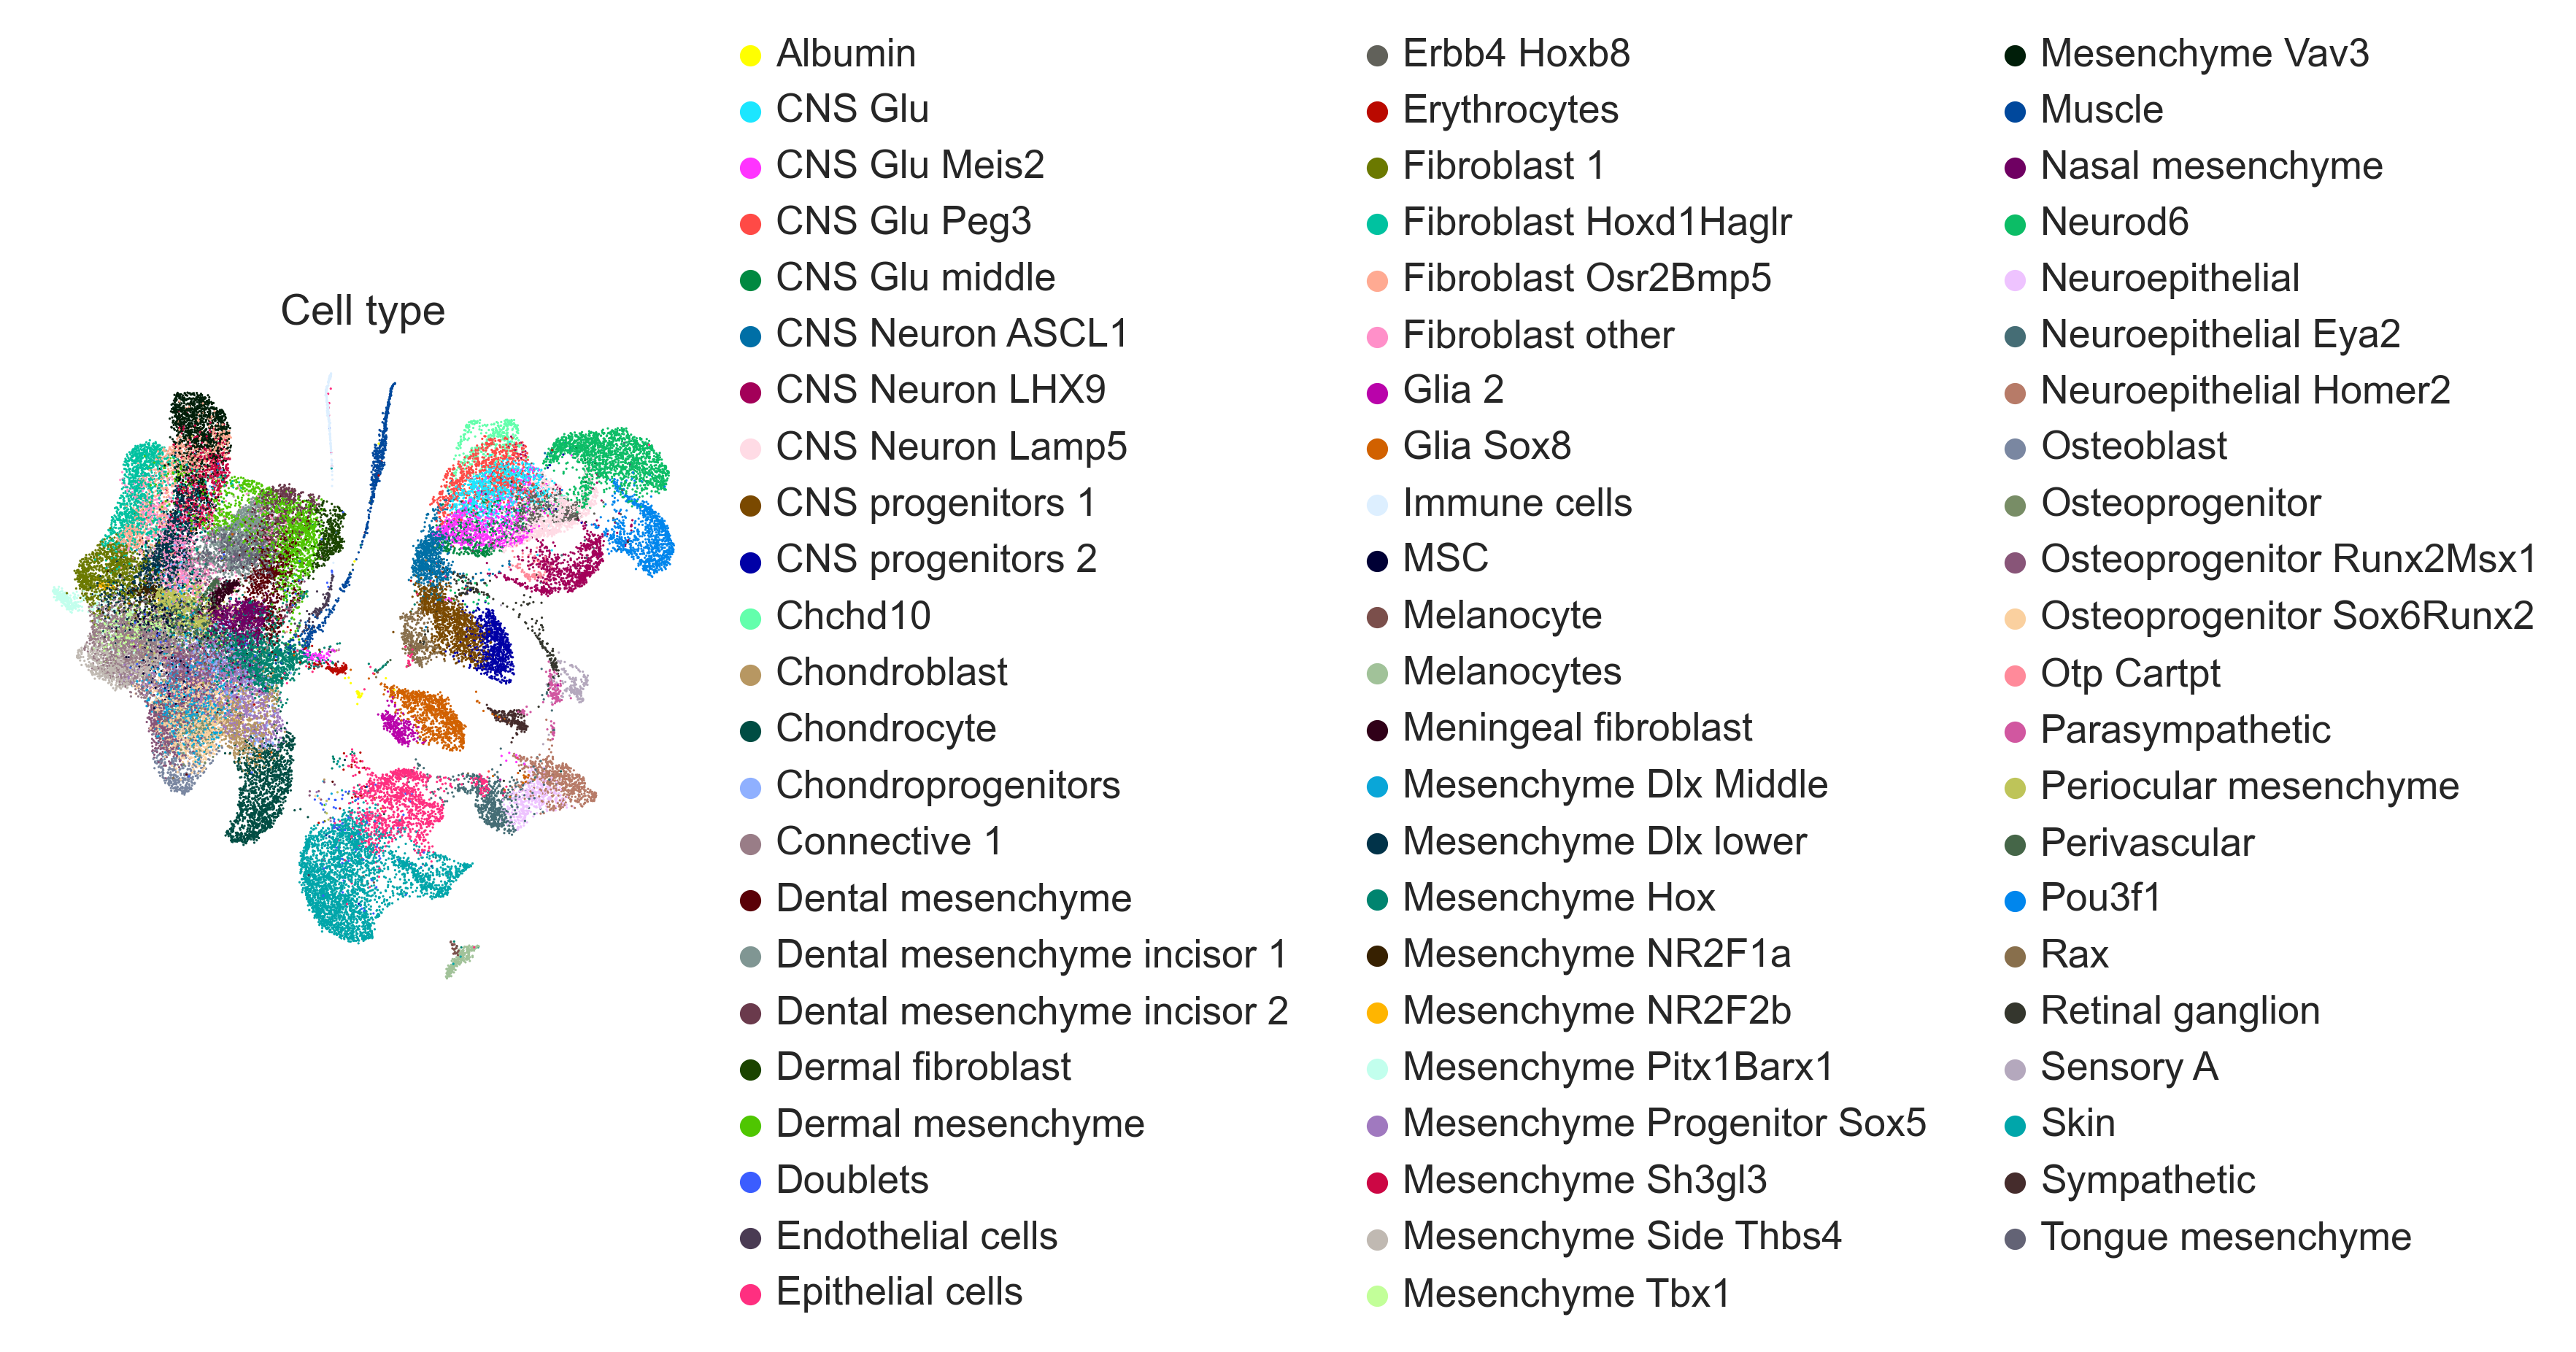

In [4]:
adata = sc.read_h5ad(f"{DATA_PATH}/anndatas/face_E13_reference.h5ad")

adata = adata[list(adata_m.obs_names) + list(adata_n.obs_names) + list(adata_o.obs_names)]
adata.obs["celltype_l2"] = list(adata_m.obs.celltype_l2) + list(adata_n.obs.celltype_l2) + list(adata_o.obs.celltype_l2)
adata.obs["celltype_l3"] = list(adata_m.obs.celltype_l3) + list(adata_n.obs.celltype_l3) + list(adata_o.obs.celltype_l3)
adata.obs["celltype_l0"] = ct_l0

sc.pl.umap(adata, color="celltype_l2", title="Cell type", frameon=False)
sc.pl.umap(adata, color="celltype_l3", title="Cell type", frameon=False)

In [5]:
adata.raw.to_adata().write_h5ad(f"{DATA_PATH}/cellxgene/face_E13.h5ad")
adata.write_h5ad(f"{DATA_PATH}/anndatas/face_E13_reference.h5ad")

In [7]:
adata.obs.groupby(["E7.5:clones", "celltype_l2"]).size().unstack().to_csv(f"{DATA_PATH}/clonal_composition/face_E7_5_l2.csv")
adata.obs.groupby(["E8.5:clones", "celltype_l2"]).size().unstack().to_csv(f"{DATA_PATH}/clonal_composition/face_E8_5_l2.csv")

adata.obs.groupby(["E7.5:clones", "celltype_l2"]).size().unstack().to_csv(f"{DATA_PATH}/clonal_composition/face_E7_5_l3.csv")
adata.obs.groupby(["E8.5:clones", "celltype_l2"]).size().unstack().to_csv(f"{DATA_PATH}/clonal_composition/face_E8_5_l3.csv")